In [1]:
#flask version
import flask
print(flask.__version__)

3.0.3


C:\Users\20101\AppData\Local\Temp\ipykernel_6464\2962917615.py:3: DeprecationWarning: The '__version__' attribute is deprecated and will be removed in Flask 3.1. Use feature detection or 'importlib.metadata.version("flask")' instead.
  print(flask.__version__)


In [2]:
import tensorflow as tf

In [3]:
#read_image
IMG_DIMEN = 224
N_COLORS = 3

In [4]:
import cv2
import numpy as np

def read_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, dsize=(IMG_DIMEN, IMG_DIMEN))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32')/255.0
    return img

In [5]:
#visualizing an image
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    plt.figure(figsize=(6, 6))
    if N_COLORS == 3:
        plt.imshow(img)
    elif N_COLORS == 1:
         plt.imshow(img, cmap='gray')
    plt.show()

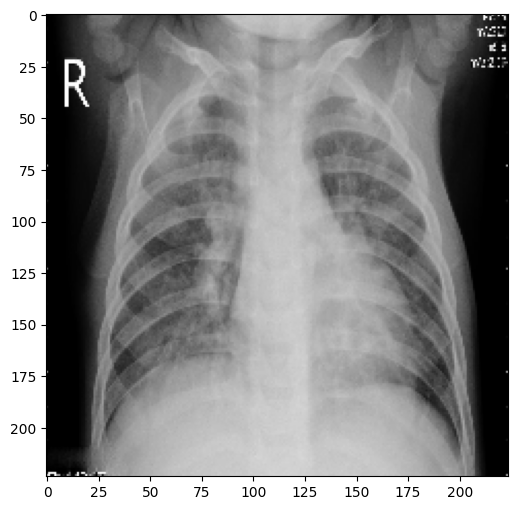

In [6]:
#show_image
img =read_image('D:/xampp/htdocs/xampp/DEPI-Project/chest-ray/chest_xray/test/PNEUMONIA/person1679_virus_2896.jpeg')
imshow(img)

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten,Dropout,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

for layer in base_model.layers:
  layer.trainable=False

x=base_model.output
x=Flatten()(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.5)(x)
output_vgg=Dense(1,activation='sigmoid')(x)
model_vgg=Model(inputs=base_model.input,outputs=output_vgg)
# compile model
model_vgg.compile(optimizer=Adam(learning_rate=0.00001),loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
#load saved_model
from tensorflow.keras.models import load_model

In [9]:
model_vgg.load_weights('D:/Xampp/htdocs/xampp/DEPI-Project/chest-ray/Saved-model/pneumonia_detection.h5')

In [10]:
#classify_image
def classify_image(img_path):
    img = read_image(img_path)
    return float(model_vgg.predict(np.array([img])).squeeze())

In [11]:
classify_image('D:/xampp/htdocs/xampp/DEPI-Project/chest-ray/chest_xray/test/PNEUMONIA/person1679_virus_2896.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step


0.9185473918914795

In [ ]:
#flask_API
from flask import Flask
from flask import request

app = Flask(__name__)

@app.route('/classify', methods = ['POST'])
def classify_handler():
    img_path = request.form['path']
    y_pred = classify_image(img_path)
    class_name = 'PNEUMONIA' if y_pred >= 0.5 else 'NORMAL'
    prob_PNEUMONIA = y_pred
    prob_NORMAL = 1 - y_pred
    print('img_path:', img_path)
    print('y_pred:', y_pred)
    print('class_name:', class_name)
    return {
        'prob_NORMAL': prob_NORMAL, 
        'prob_PNEUMONIA': prob_PNEUMONIA, 
        'class_name': class_name
    }

app.run(port=8000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


127.0.0.1 - - [20/Oct/2024 15:42:41] "POST /classify HTTP/1.1" 200 -


img_path: D:/Xampp/htdocs/xampp/DEPI-Project/chest-ray/X-ray-images/17294281583136757436714fabeb232f.jpeg
y_pred: 0.9685114026069641
class_name: PNEUMONIA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


127.0.0.1 - - [20/Oct/2024 15:44:27] "POST /classify HTTP/1.1" 200 -


img_path: D:/Xampp/htdocs/xampp/DEPI-Project/chest-ray/X-ray-images/17294282646272585636714fb28c7223.jpeg
y_pred: 0.17357677221298218
class_name: NORMAL
